# 世界の最新の感染者数

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
del df["Lat"]
del df["Long"]

In [3]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045
1,NaN,Albania,0,0,0,0,0,0,0,0,...,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470
4,NaN,Angola,0,0,0,0,0,0,0,0,...,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695


In [4]:
latest_date = df.tail(1).columns[-1]
latest_date

'5/13/21'

In [5]:
latest_column_key = df.columns[-1]
df = df[['Province/State','Country/Region',latest_column_key]]
df = df.rename(columns={latest_column_key:"latest_confirmed"})
df.head()

,Province/State,Country/Region,latest_confirmed
0,NaN,Afghanistan,63045
1,NaN,Albania,131890
2,NaN,Algeria,124889
3,NaN,Andorra,13470
4,NaN,Angola,29695


## 全世界の最新の感染者数

In [6]:
print("全世界感染者数({}時点):{:,}人".format(latest_date,df["latest_confirmed"].sum()))

全世界感染者数(5/13/21時点):161,176,148人


## 国別の最新の感染者数

In [7]:
country = df.groupby(["Country/Region"],as_index=False).sum("latest_confirmed")
country = country.sort_values("latest_confirmed", ascending=False)

In [8]:
country.head()

,Country/Region,latest_confirmed
178,US,32852871
79,India,24046809
23,Brazil,15433989
62,France,5902343
177,Turkey,5083996


In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


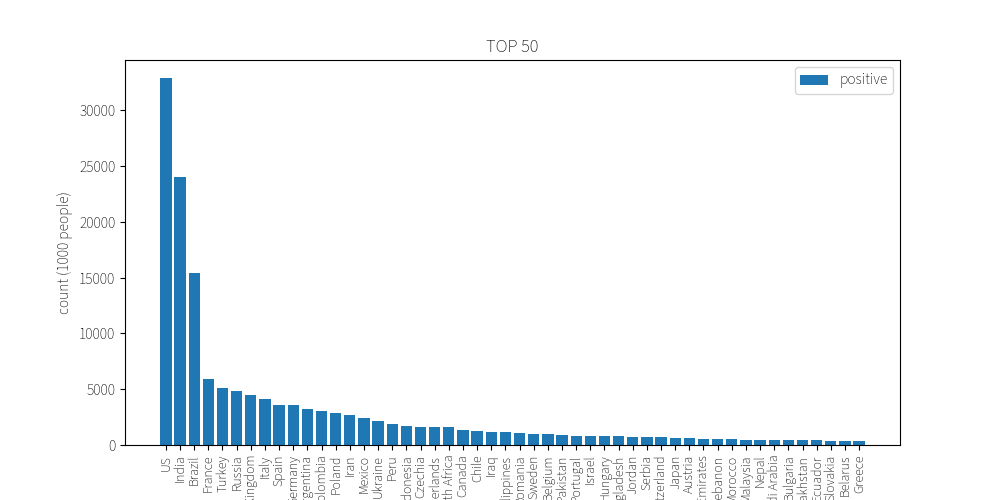

In [10]:
plt.figure(figsize=(10,5))
plt.title("TOP 50")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("count (1000 people)")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.bar(country.head(50)["Country/Region"],country.head(50)["latest_confirmed"]/1000,label="positive")
plt.legend()

## ヒストグラム 

<IPython.core.display.Javascript object>


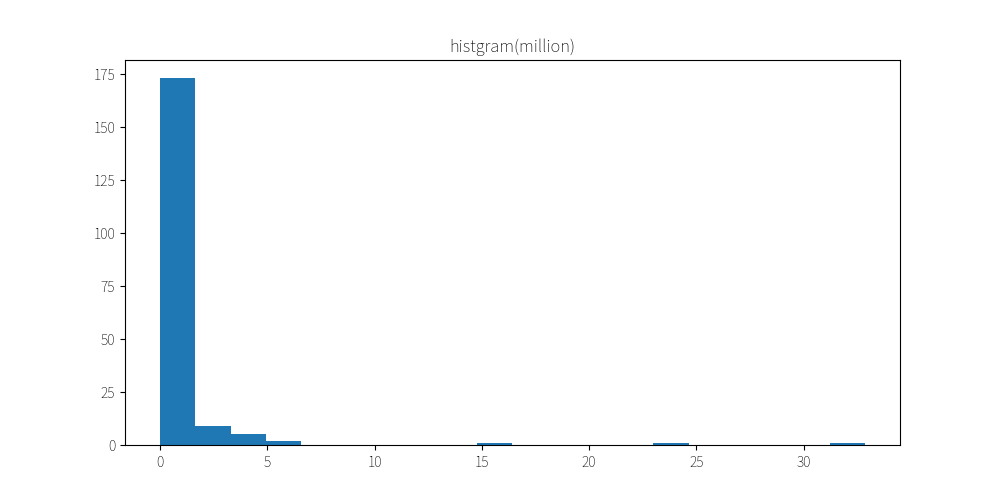

(array([173.,   9.,   5.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000000e-06, 1.64264450e+00, 3.28528800e+00, 4.92793150e+00,
        6.57057500e+00, 8.21321850e+00, 9.85586200e+00, 1.14985055e+01,
        1.31411490e+01, 1.47837925e+01, 1.64264360e+01, 1.80690795e+01,
        1.97117230e+01, 2.13543665e+01, 2.29970100e+01, 2.46396535e+01,
        2.62822970e+01, 2.79249405e+01, 2.95675840e+01, 3.12102275e+01,
        3.28528710e+01]),
 <a list of 20 Patch objects>)

In [29]:
plt.figure(figsize=(10,5))
plt.title("histgram(million)")
#plt.xticks(rotation="90",fontsize=9)
#plt.ylabel("count (1000 people)")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(country["latest_confirmed"]/1000000,bins=20)

## 人口比率

In [12]:
pop = pd.read_excel("world-data/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx",header=16)
pop.head(1)

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,NaN,900,World,0,2536431.018,2584034.227,2630861.69,...,7041194.168,7125827.957,7210582.041,7295290.759,7379796.967,7464021.934,7547858.9,7631091.113,7713468.205,7794798.729


In [13]:
pop.iloc[:,-1]

0      7794798.729
1              ...
2      1273304.261
3      6521494.468
4      1057438.163
          ...     
284         62.273
285      37742.157
286         56.772
287          5.795
288     331002.647
Name: 2020, Length: 289, dtype: object

In [14]:
pop_latest = pop.loc[pop["Type"]=="Country/Area"][[pop.columns[2],pop.columns[-1]]]

In [15]:
pop_latest.columns = ["country","population"]

In [16]:
pop_latest.head()

,country,population
26,Burundi,11890.781
27,Comoros,869.595
28,Djibouti,988.002
29,Eritrea,3546.427
30,Ethiopia,114963.583


In [17]:
country.head()

,Country/Region,latest_confirmed
178,US,32852871
79,India,24046809
23,Brazil,15433989
62,France,5902343
177,Turkey,5083996


In [18]:
c_merged = pd.merge(country, pop_latest, left_on="Country/Region", right_on="country", how="left")
c_merged.loc[c_merged["country"].isna()]

,Country/Region,latest_confirmed,country,population
0,US,32852871,NaN,NaN
5,Russia,4857303,NaN,NaN
13,Iran,2722007,NaN,NaN
54,Bolivia,324868,NaN,NaN
57,West Bank and Gaza,303270,NaN,NaN
65,Moldova,253386,NaN,NaN
73,Venezuela,211838,NaN,NaN
81,Burma,143004,NaN,NaN
84,"Korea, South",130380,NaN,NaN
90,Kosovo,106243,NaN,NaN


In [19]:
p_merged = pd.merge(pop_latest, country, left_on="country", right_on="Country/Region", how="left")
len(p_merged.loc[p_merged["Country/Region"].isna()])

65

In [20]:
pop_latest.loc[pop_latest["country"].str.contains("Syria")]

,country,population
104,Syrian Arab Republic,17500.657


In [21]:
renames = {
    "US":"United States of America",
    "Russia":"Russian Federation",
    "Iran":"Iran (Islamic Republic of)",
    "Bolivia":"Bolivia (Plurinational State of)",
    "Moldova":"Republic of Moldova",
    "Venezuela":"Venezuela (Bolivarian Republic of)",
    "Korea, South":"Republic of Korea",
    "Congo (Kinshasa)":"Democratic Republic of the Congo",
    "Congo (Brazzaville)":"Congo",
    "Vietnam":"Viet Nam",
    "Laos":"Lao People's Democratic Republic",
    "Taiwan*":"China, Taiwan Province of China",
    "Tanzania":"United Republic of Tanzania",
    "Brunei":"Brunei Darussalam",
    "Micronesia":"Micronesia (Fed. States of)",
    "Syria":"Syrian Arab Republic",
}

In [22]:
country_renamed = country.copy()
country_renamed["Country/Region"].replace(renames,inplace=True)

In [23]:
c_merged = pd.merge(country_renamed, pop_latest, left_on="Country/Region", right_on="country", how="left")
c_merged.loc[c_merged["country"].isna()]

,Country/Region,latest_confirmed,country,population
57,West Bank and Gaza,303270,NaN,NaN
81,Burma,143004,NaN,NaN
90,Kosovo,106243,NaN,NaN
110,Cote d'Ivoire,46520,NaN,NaN
178,Diamond Princess,712,NaN,NaN
187,MS Zaandam,9,NaN,NaN


In [24]:
c_merged["positives per 1000 population"] = c_merged["latest_confirmed"] / (c_merged["population"])

In [25]:
c_merged = c_merged.sort_values("positives per 1000 population", ascending=False)

<IPython.core.display.Javascript object>


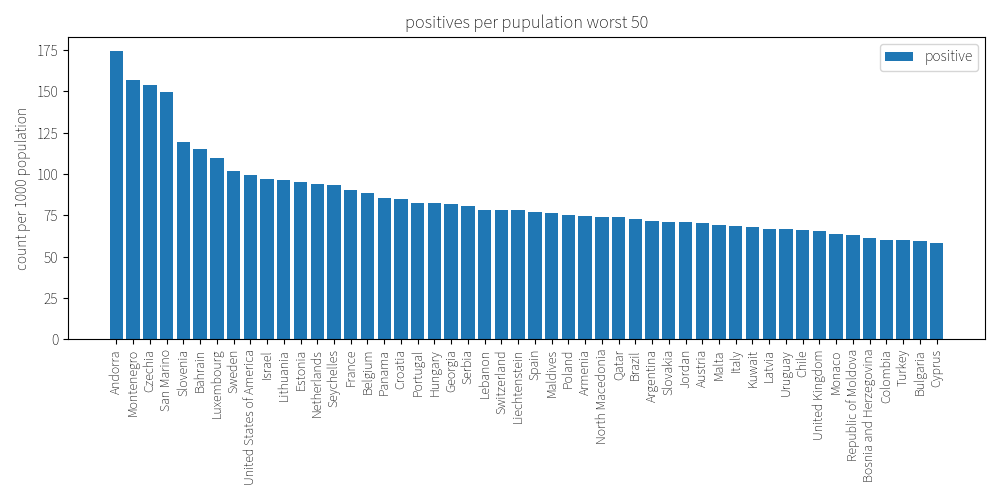

In [26]:
plt.figure(figsize=(10,5))
plt.title("positives per pupulation worst 50")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("count per 1000 population")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.bar(c_merged.head(50)["Country/Region"],c_merged.head(50)["positives per 1000 population"],label="positive")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


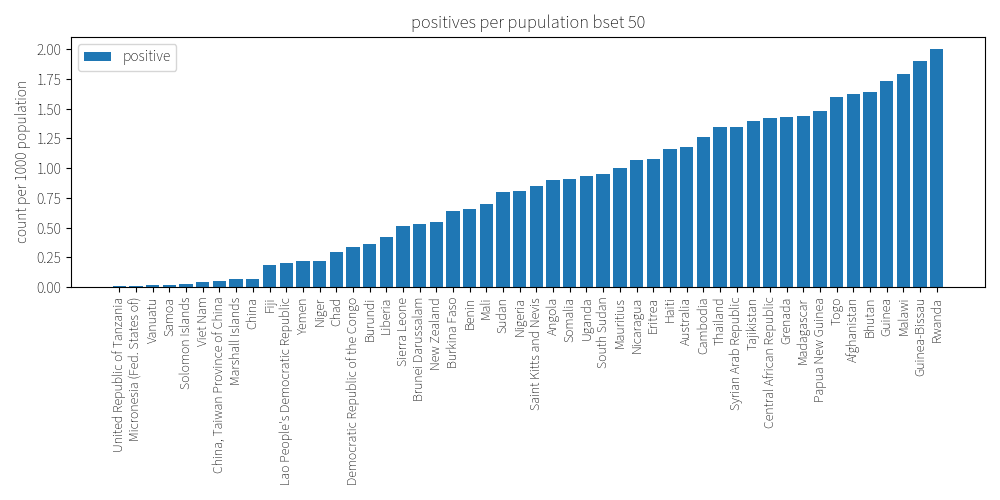

In [27]:
c_asc = c_merged.sort_values("positives per 1000 population")
plt.figure(figsize=(10,5))
plt.title("positives per pupulation bset 50")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("count per 1000 population")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.bar(c_asc.head(50)["Country/Region"],c_asc.head(50)["positives per 1000 population"],label="positive")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


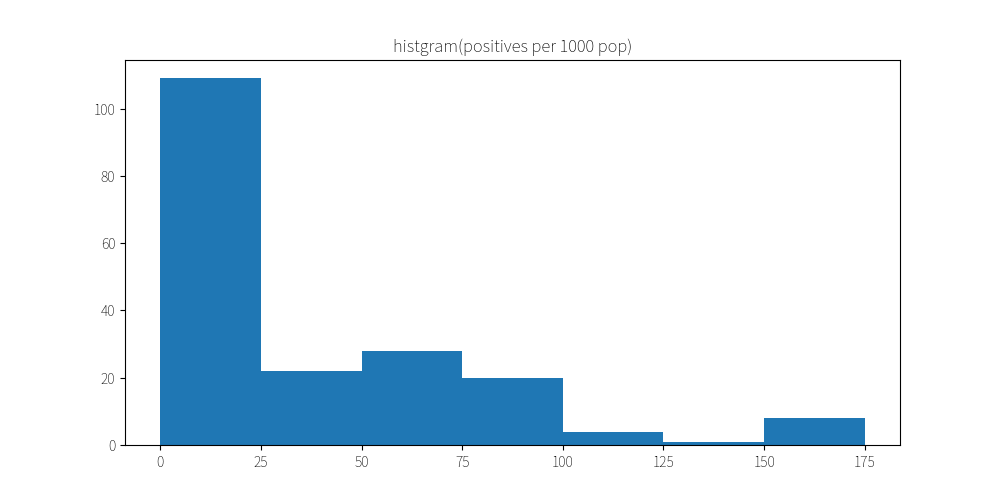

(array([109.,  22.,  28.,  20.,   4.,   1.,   8.]),
 array([  0,  25,  50,  75, 100, 125, 150, 175]),
 <a list of 7 Patch objects>)

In [28]:
plt.figure(figsize=(10,5))
plt.title("histgram(positives per 1000 pop)")
plt.hist(c_merged["positives per 1000 population"],bins=[0,25,50,75,100,125,150,175])